Importing required modules

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [3]:
attribute_names = ["attribute 1","attribute 2", "attribute 3", "attribute 4","attribute 5","attribute 6","attribute 7","attribute 8","attribute 9","attribute 10","attribute 11","attribute 12","attribute 13","attribute 14","attribute 15","attribute 16"]

Column names were given here as the dataset doesn't contain column names due to confidentiality of the data. All the values were also changed into meaningless symbols and alphabets to protect the confidentiality of the data.

In [4]:
data = pd.read_csv('crx.data', names=attribute_names) #loading the dataset

Exploring the dataset and performing data preprocessing.....

In [5]:
data

,attribute 1,attribute 2,attribute 3,attribute 4,attribute 5,attribute 6,attribute 7,attribute 8,attribute 9,attribute 10,attribute 11,attribute 12,attribute 13,attribute 14,attribute 15,attribute 16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [6]:
data.shape

(690, 16)

In [7]:
data.describe()

,attribute 3,attribute 8,attribute 11,attribute 15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [8]:
print(f"Null values in dataset: {data.isna().values.sum()}")

Null values in dataset: 0


In [9]:
if '?' in data.values:
    print("present")
else:
    print("not")

present


The data set containing some values as '?'. These fields will be replaced with null values.

In [10]:
data = data.replace("?",np.NaN)

In [11]:
print(f"There were {data.isna().values.sum()} null values after replacing '?' with 'nan'")


There were 67 null values after replacing '?' with 'nan'


Mean imputation is performed here to impute mean values into those missing fields

In [12]:
data = data.fillna(data.mean())
print(f"There were {data.isna().values.sum()} null values after mean imputation")

There were 67 null values after mean imputation


/var/folders/hp/ts037vf542d73bs1l99r7tl40000gn/T/ipykernel_67419/2996714759.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


There is no null values in columns with numerical data types. The null values were present in columns with object data type. These cannot be replaced using mean imputation. All the values will be replaced using the most frequent value in the respective column.

In [13]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].fillna(data[i].value_counts().index[0])
print(f"There were {data.isna().values.sum()} null values now.")
        

There were 0 null values now.


In [14]:
print(f"Duplicate values in dataset: {data.duplicated().sum()}")

Duplicate values in dataset: 0


Performing label encoding to change the non numerical values to numerical values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute 1   690 non-null    object 
 1   attribute 2   690 non-null    object 
 2   attribute 3   690 non-null    float64
 3   attribute 4   690 non-null    object 
 4   attribute 5   690 non-null    object 
 5   attribute 6   690 non-null    object 
 6   attribute 7   690 non-null    object 
 7   attribute 8   690 non-null    float64
 8   attribute 9   690 non-null    object 
 9   attribute 10  690 non-null    object 
 10  attribute 11  690 non-null    int64  
 11  attribute 12  690 non-null    object 
 12  attribute 13  690 non-null    object 
 13  attribute 14  690 non-null    object 
 14  attribute 15  690 non-null    int64  
 15  attribute 16  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [16]:
encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtype == "object":
        data[i] = encoder.fit_transform(data[i])


In [17]:
data

,attribute 1,attribute 2,attribute 3,attribute 4,attribute 5,attribute 6,attribute 7,attribute 8,attribute 9,attribute 10,attribute 11,attribute 12,attribute 13,attribute 14,attribute 15,attribute 16
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,52,10.085,2,2,4,3,1.25,0,0,0,0,0,90,0,1
686,0,71,0.750,1,0,1,7,2.00,0,1,2,1,0,67,394,1
687,0,97,13.500,2,2,5,2,2.00,0,1,1,1,0,67,1,1
688,1,20,0.205,1,0,0,7,0.04,0,0,0,0,0,96,750,1


All the data is transformed into numeric by performing label encoding. Splitting the data into training and testing sets.

In [18]:
X = data.drop('attribute 16',axis=1) #splitting the data other than target variable as X
y = data['attribute 16'] #splitting the target variable as y

scaler = MinMaxScaler() #scaling the data
scaled_x = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.3,random_state=42)

Tuning hyperparameters for logistic regression and implementing it.

In [19]:
parameter_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear']}
lr = LogisticRegression()
gs = GridSearchCV(lr,param_grid=parameter_grid,cv=5,n_jobs=-1)
gs.fit(X_train,y_train)
print(f"best estimator: {gs.best_estimator_}")

/Users/vamsishree/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vamsishree/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vamsishree/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vamsishree/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/

best estimator: LogisticRegression(C=0.1, solver='liblinear')


/Users/vamsishree/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.86116838 0.86121134 0.86945876        nan 0.85910653
 0.85496134 0.8570232         nan 0.85081615 0.85493986 0.85285653]
  warnings.warn(


In [20]:
lr = LogisticRegression(C=0.1,solver='liblinear')
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test,pred)
f1score_lr = f1_score(y_test,pred)
print(f"Accuracy of logistic regression: {accuracy_lr}")
print(f"F1 score of logistic regression: {f1score_lr}")

Accuracy of logistic regression: 0.8454106280193237
F1 score of logistic regression: 0.8476190476190476


Tuning hyperparameters for support vector machine and implementing it.

In [21]:
parameter_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()
gs = GridSearchCV(svc,param_grid=parameter_grid,cv=5,n_jobs=-1)
gs.fit(X_train,y_train)

print(gs.best_estimator_)

SVC(C=0.1, kernel='linear')


In [22]:
svc = SVC(C=0.1,kernel='linear')
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test,pred_svc)
f1score_svc = f1_score(y_test,pred_svc)
print(f"Accuracy of support vector machine: {accuracy_svc}")
print(f"F1 score of support vector machine: {f1score_svc}")


Accuracy of support vector machine: 0.8405797101449275
F1 score of support vector machine: 0.8374384236453202


Tuning hyperparameters for random forest classification and implementing it

In [23]:
parameter_grid = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 4, 6]}
rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf,param_grid=parameter_grid,cv=5,n_jobs=-1)
gs.fit(X_train,y_train)

print(gs.best_estimator_)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=3,
                       random_state=42)


In [24]:
rf = RandomForestClassifier(random_state= 42, max_depth=7,max_features='sqrt',min_samples_leaf=3)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,pred_rf)
f1score_rf = f1_score(y_test,pred_rf)
print(f"Accuracy of support vector machine: {accuracy_rf}")
print(f"F1 score of support vector machine: {f1score_rf}")


Accuracy of support vector machine: 0.8743961352657005
F1 score of support vector machine: 0.8828828828828829


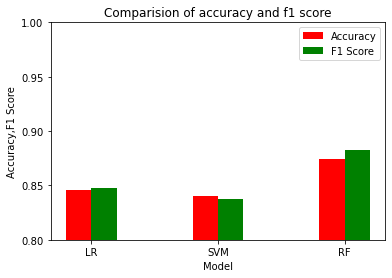

In [36]:
import matplotlib.pyplot as plt

labels = ['LR', 'SVM', 'RF']
acc = [accuracy_lr,accuracy_svc,accuracy_rf]
f1 = [f1score_lr,f1score_svc,f1score_rf]
figure, axis = plt.subplots()
axis.set_xlabel('Model')
axis.set_ylabel('Accuracy,F1 Score')
axis.set_title('Comparision of accuracy and f1 score')
plt.ylim([0.8, 1.0])
plt.yticks([0.8, 0.85, 0.9, 0.95, 1.0])
x_position = np.arange(len(labels))
axis.set_xticks(x_position)
axis.set_xticklabels(labels)
axis.bar(x_position - 0.1, acc, width=0.2, color='red', label='Accuracy')
axis.bar(x_position + 0.1, f1, width=0.2, color='green', label='F1 Score')
axis.legend()
plt.show()